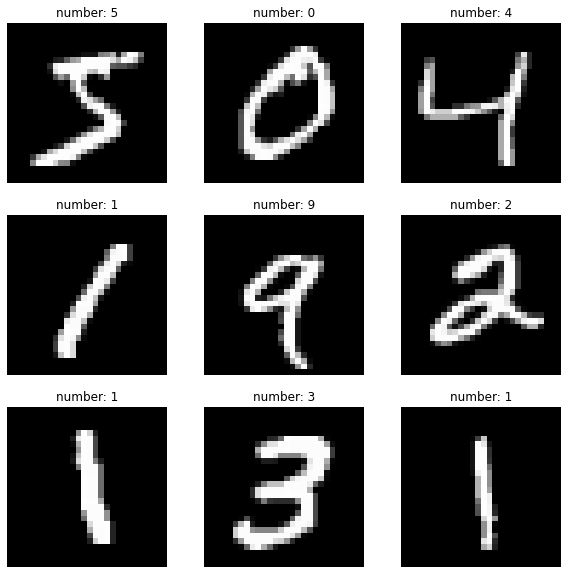

In [1]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
#Imported Dataset from Mnist Database.
import matplotlib.pyplot as plt
%matplotlib inline
fig,axis=plt.subplots(nrows=3,ncols=3,figsize=(10,10))
plt.gray()
for i,ax in enumerate(axis.flat):
    ax.imshow(x_train[i])
    ax.axis('off')
    ax.set_title("number: {}".format(y_train[i]))
#Created a Subplot showing the 1st 10 dataset images.

In [2]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
input_shape=[x_train.shape[1],x_train.shape[2],1]
x_train/=255
x_test/=255
# Normalized the above X_Train,X_Test by Dividing them by 255(since pixels max. value is 255) to change the range to 0 to 1
cnn=tf.keras.models.Sequential()
# Created a Sequential Model.
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=input_shape))
# Added a Convulational Layer.
cnn.add(MaxPooling2D(pool_size=2,strides=1))
# Added a Pooling Layer.
#cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=input_shape))     these layers can be added/removed 
#cnn.add(MaxPooling2D(pool_size=2,strides=1))                                            98.6% accuracy if added
cnn.add(Flatten())
# Added a Flattened layer of the above 2 layers.
cnn.add(Dense(units=128,activation='relu'))
# Added a Dense Neural Network.
cnn.add(Dropout(rate=0.2))
# Added a Dropout Layer to reduce Overfitting.
cnn.add(Dense(units=10,activation='softmax'))
# Added a final Output Layer to classify the images as numbers.
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Defining the optimizer,loss and metrics function using compile.
cnn.fit(x=x_train,y=y_train,epochs=1)
# Fitting the model to x_train,y_train sets.
cnn.evaluate(x_test,y_test)
# Evaluating model for new data sets.

313/313 [==============================] - 2s 5ms/step - loss: 0.0475 - accuracy: 0.9844


[0.04745221510529518, 0.9843999743461609]